# One dimensional Finite difference derivatives

Lets consider the function $f(x)=e^x$, sampled on a grid. We will calculate the derivative at a give $x$ point for a variety of grid spacings $\Delta x$ with three different levels off approximation: forward difference of order one, central difference of order two, and central difference of order four. Note that on the left side of the plot we see similar behavior for all cases due to intrinsic rounding errors. However, the higher-order approximations allow us to obtain better accuracy (at larger $\Delta x$) before the truncation errors kick in.


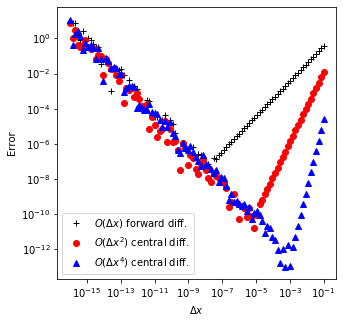

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# x point for derivative
x=2

# Make a log grid
delta_x_grid=np.logspace(-16,-1,num=100)

# calculate the error under different approximations
# (easy since we know the analytical result)
eps_O1_forward=[]
eps_O2_central=[]
eps_O4_central=[]
for delta_x in delta_x_grid:
    fo_deriv=(np.exp(x+delta_x)-np.exp(x))/delta_x
    eps_O1_forward.append(abs(fo_deriv-np.exp(x)))

    fo_deriv=(0.5*np.exp(x+delta_x)-0.5*np.exp(x-delta_x))/delta_x
    eps_O2_central.append(abs(fo_deriv-np.exp(x)))

    fo_deriv=((1.0/12.0)*np.exp(x-2.*delta_x)-(2.0/3.0)*np.exp(x-delta_x) \
              +(2.0/3.0)*np.exp(x+delta_x)-(1.0/12.0)*np.exp(x+2.*delta_x))/delta_x
    eps_O4_central.append(abs(fo_deriv-np.exp(x)))

# Plot the results
fig_exp_orders,ax1=plt.subplots(figsize=(5,5))

ax1.plot(delta_x_grid,eps_O1_forward,'k+',label='$O(\Delta x$) forward diff.')
ax1.plot(delta_x_grid,eps_O2_central,'ro',label='$O(\Delta x^2$) central diff.')
ax1.plot(delta_x_grid,eps_O4_central,'b^',label='$O(\Delta x^4$) central diff.')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$\Delta x$')
ax1.set_ylabel('Error')
ax1.legend()

plt.savefig('Exp_deriv.pdf',bbox_inches='tight')
plt.show()